# Problem Statement

Based on the given loan data can we understand the major factors or characteristics of a borrower which makes them to get into delinquent stage.

• Delinquency is a major metric in assessing risk as more and more customers getting delinquent means the risk of customers that will default will also increase.

• The main objective is to minimize the risk for which you need to build a decision tree model using CART technique that will identify various risk and non-risk attributes of borrower’s to get into delinquent stage

# Importing libraries and Loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
ld_df = pd.read_csv("Loan Delinquent Dataset.csv")

# Checking the data

In [3]:
ld_df.head()

,ID,delinquent,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,Yes,1,36 months,Female,House,Mortgage,>25,300-500
1,2,No,0,36 months,Female,House,Rent,20-25,>500
2,3,Yes,1,36 months,Female,House,Rent,>25,300-500
3,4,Yes,1,36 months,Female,Car,Mortgage,>25,300-500
4,5,Yes,1,36 months,Female,House,Rent,>25,300-500


### Dropping unwanted variables

Sdelinquent can also be dropped instead of delinquent.

In [4]:
ld_df=ld_df.drop(["ID","delinquent"],axis=1) 

In [5]:
ld_df.head()

,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,36 months,Female,House,Mortgage,>25,300-500
1,0,36 months,Female,House,Rent,20-25,>500
2,1,36 months,Female,House,Rent,>25,300-500
3,1,36 months,Female,Car,Mortgage,>25,300-500
4,1,36 months,Female,House,Rent,>25,300-500


In [6]:
ld_df.shape

(11548, 7)

In [7]:
ld_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sdelinquent     11548 non-null  int64 
 1   term            11548 non-null  object
 2   gender          11548 non-null  object
 3   purpose         11548 non-null  object
 4   home_ownership  11548 non-null  object
 5   age             11548 non-null  object
 6   FICO            11548 non-null  object
dtypes: int64(1), object(6)
memory usage: 631.7+ KB


many columns are of type object i.e. strings. These need to be converted to ordinal type

### Geting unique counts of all Objects

In [8]:
print('term \n',ld_df.term.value_counts())
print('\n')
print('gender \n',ld_df.gender.value_counts())
print('\n')
print('purpose \n',ld_df.purpose.value_counts())
print('\n')
print('home_ownership \n',ld_df.home_ownership.value_counts())
print('\n')
print('age \n',ld_df.age.value_counts())
print('\n')
print('FICO \n',ld_df.FICO.value_counts())

term 
 36 months    10589
60 months      959
Name: term, dtype: int64


gender 
 Male      6555
Female    4993
Name: gender, dtype: int64


purpose 
 House       6892
Car         2080
Other        928
Personal     892
Wedding      408
Medical      266
other         82
Name: purpose, dtype: int64


home_ownership 
 Mortgage    5461
Rent        5216
Own          871
Name: home_ownership, dtype: int64


age 
 20-25    5888
>25      5660
Name: age, dtype: int64


FICO 
 300-500    6370
>500       5178
Name: FICO, dtype: int64


In [9]:
ld_df['purpose']=ld_df['purpose'].replace('other','Other')

In [10]:
ld_df['purpose'].value_counts()

House       6892
Car         2080
Other       1010
Personal     892
Wedding      408
Medical      266
Name: purpose, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


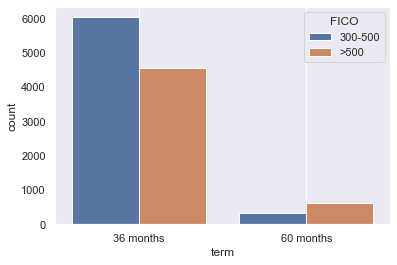

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


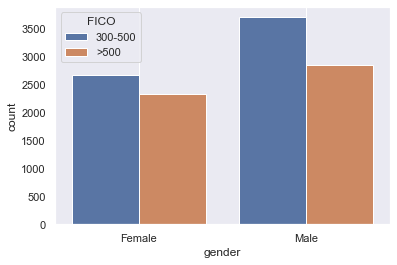

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


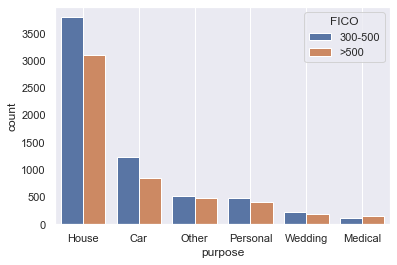

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


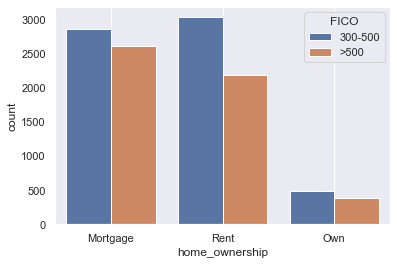

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


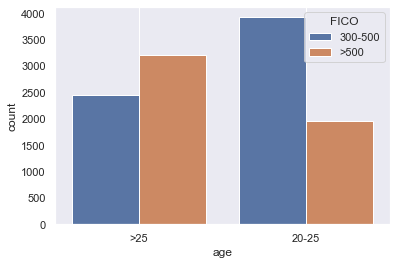

In [11]:
cols=['term','gender','purpose','home_ownership','age']
for i in cols:
    sns.set(style="darkgrid")
    sns.countplot(ld_df[i],hue=ld_df['FICO'])
    plt.grid()
    plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


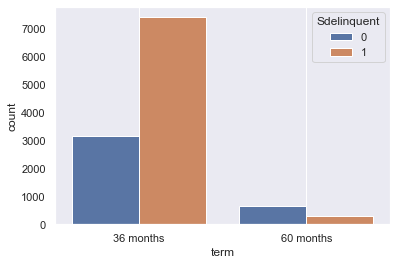

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


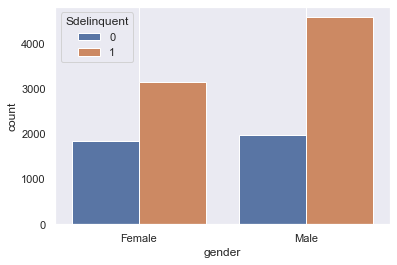

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


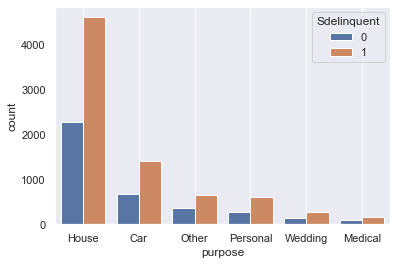

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


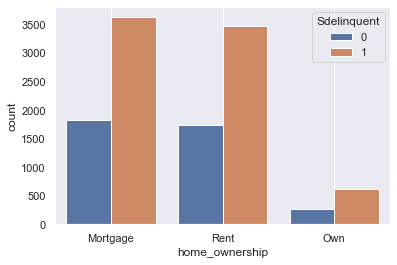

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


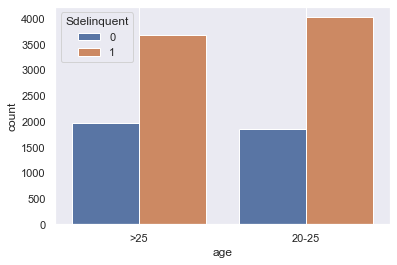

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


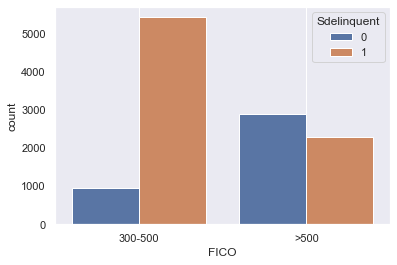

In [12]:
cols=['term','gender','purpose','home_ownership','age','FICO']
for i in cols:
    sns.set(style="darkgrid")
    sns.countplot(ld_df[i],hue=ld_df['Sdelinquent'])
    plt.grid()
    plt.show()

### Note:
Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types. 

The following code loops through each column and checks if the column type is object then converts those columns into categorical with each distinct value becoming a category.

In [13]:
for feature in ld_df.columns: 
    if ld_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(ld_df[feature].unique()))
        print(pd.Categorical(ld_df[feature].unique()).codes)
        ld_df[feature] = pd.Categorical(ld_df[feature]).codes



feature: term
['36 months', '60 months']
Categories (2, object): ['36 months', '60 months']
[0 1]


feature: gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
[0 1]


feature: purpose
['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical']
Categories (6, object): ['Car', 'House', 'Medical', 'Other', 'Personal', 'Wedding']
[1 0 3 4 5 2]


feature: home_ownership
['Mortgage', 'Rent', 'Own']
Categories (3, object): ['Mortgage', 'Own', 'Rent']
[0 2 1]


feature: age
['>25', '20-25']
Categories (2, object): ['20-25', '>25']
[1 0]


feature: FICO
['300-500', '>500']
Categories (2, object): ['300-500', '>500']
[0 1]


For each feature, look at the 2nd and 4th row to get the encoding mappings. Do not look at the line starting with 'Categories'

#### Comparing the unique counts from above

In [14]:
print('term \n',ld_df.term.value_counts())
print('\n')
print('gender \n',ld_df.gender.value_counts())
print('\n')
print('purpose \n',ld_df.purpose.value_counts())
print('\n')
print('home_ownership \n',ld_df.home_ownership.value_counts())
print('\n')
print('age \n',ld_df.age.value_counts())
print('\n')
print('FICO \n',ld_df.FICO.value_counts())

term 
 0    10589
1      959
Name: term, dtype: int64


gender 
 1    6555
0    4993
Name: gender, dtype: int64


purpose 
 1    6892
0    2080
3    1010
4     892
5     408
2     266
Name: purpose, dtype: int64


home_ownership 
 0    5461
2    5216
1     871
Name: home_ownership, dtype: int64


age 
 0    5888
1    5660
Name: age, dtype: int64


FICO 
 0    6370
1    5178
Name: FICO, dtype: int64


In [15]:
ld_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sdelinquent     11548 non-null  int64
 1   term            11548 non-null  int8 
 2   gender          11548 non-null  int8 
 3   purpose         11548 non-null  int8 
 4   home_ownership  11548 non-null  int8 
 5   age             11548 non-null  int8 
 6   FICO            11548 non-null  int8 
dtypes: int64(1), int8(6)
memory usage: 158.0 KB


In [16]:
ld_df.head()

,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,0,0,1,0,1,0
1,0,0,0,1,2,0,1
2,1,0,0,1,2,1,0
3,1,0,0,0,0,1,0
4,1,0,0,1,2,1,0


Label Encoding has been done and all columns are converted to number

### Proportion of 1s and 0s

In [17]:
ld_df.Sdelinquent.value_counts(normalize=True)

1    0.668601
0    0.331399
Name: Sdelinquent, dtype: float64

In [18]:
print(ld_df.Sdelinquent.value_counts())
print('%1s',7721/(7721+3827))
print('%0s',3827/(7721+3827))

1    7721
0    3827
Name: Sdelinquent, dtype: int64
%1s 0.668600623484586
%0s 0.3313993765154139


### Extracting the target column into separate vectors for training set and test set

In [19]:
X = ld_df.drop("Sdelinquent", axis=1)

y = ld_df.pop("Sdelinquent")

X.head()

,term,gender,purpose,home_ownership,age,FICO
0,0,0,1,0,1,0
1,0,0,1,2,0,1
2,0,0,1,2,1,0
3,0,0,0,0,1,0
4,0,0,1,2,1,0


### Splitting data into training and test set

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

### Checking the dimensions of the training and test data

In [21]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',8083+3465)

X_train (8083, 6)
X_test (3465, 6)
train_labels (8083,)
test_labels (3465,)
Total Obs 11548


### Building a Decision Tree Classifier

In [22]:
# Initialise a Decision Tree Classifier

dt_model=DecisionTreeClassifier()

In [23]:
# Fit the model
dt_model.fit(X_train,train_labels)

DecisionTreeClassifier()

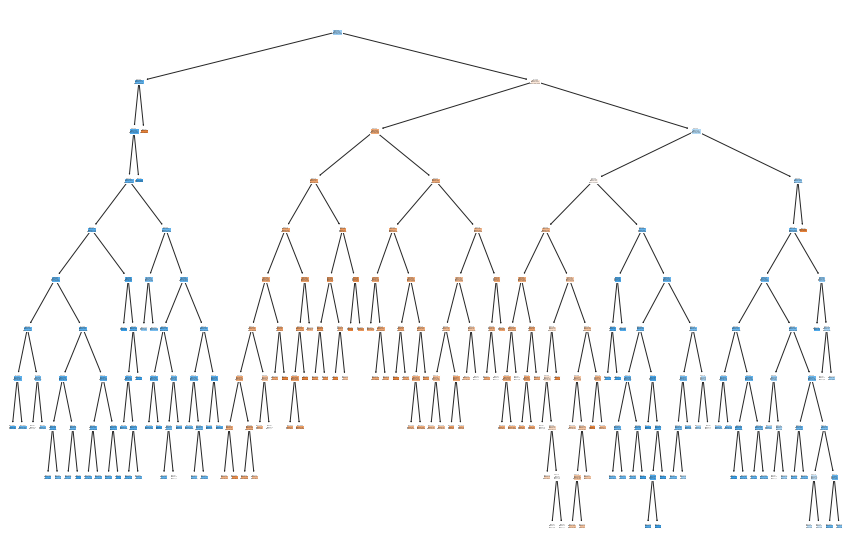

In [24]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt_model,filled=True);

In [25]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()


The above code will save a .dot file in your working directory.  
WebGraphviz is Graphviz in the Browser.   
Copy paste the contents of the file into the link below to get the visualization     
http://webgraphviz.com/

### Variable Importance

In [26]:
dt_model.feature_importances_

array([0.37005178, 0.15866373, 0.01092402, 0.01063264, 0.0558129 ,
       0.39391494])

In [27]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


                     Imp
FICO            0.393915
term            0.370052
gender          0.158664
age             0.055813
purpose         0.010924
home_ownership  0.010633


### Predicting Test Data

In [28]:
ytrain_predict=dt_model.predict(X_train)
ytest_predict=dt_model.predict(X_test)

In [29]:
ytest_predict.shape

(3465,)

In [30]:
# Accuracy on train data
dt_model.score(X_train,train_labels)

0.8522825683533342

In [31]:
# Accuracy on test data
dt_model.score(X_test,test_labels)

0.847041847041847

In [32]:
from sklearn.metrics import confusion_matrix,classification_report

<AxesSubplot:>

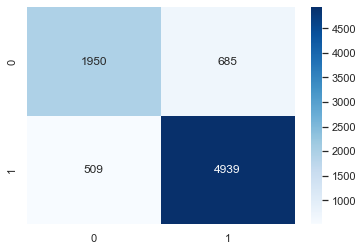

In [33]:
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True,fmt='g',cmap='Blues')

In [34]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77      2635
           1       0.88      0.91      0.89      5448

    accuracy                           0.85      8083
   macro avg       0.84      0.82      0.83      8083
weighted avg       0.85      0.85      0.85      8083



<AxesSubplot:>

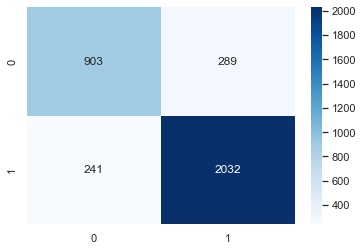

In [35]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True,fmt='g',cmap='Blues')

In [36]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1192
           1       0.88      0.89      0.88      2273

    accuracy                           0.85      3465
   macro avg       0.83      0.83      0.83      3465
weighted avg       0.85      0.85      0.85      3465



# Regularising the Decision Tree

### Adding Tuning Parameters

In [37]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 30,min_samples_leaf=100,min_samples_split=200, random_state=1)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=100,
                       min_samples_split=200, random_state=1)

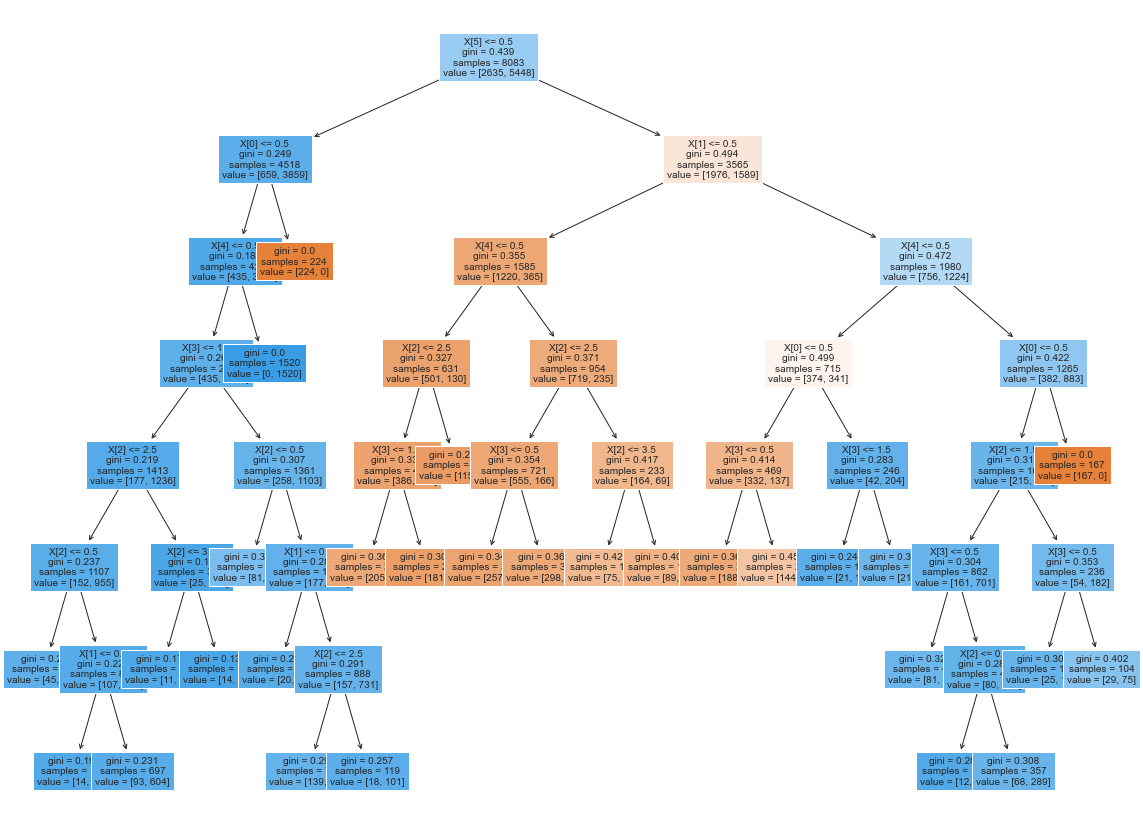

In [58]:
plt.figure(figsize=(20,15))
tree.plot_tree(reg_dt_model,filled=True,fontsize=10);

### Generating New Tree

In [39]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

### Variable Importance

In [40]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))




                     Imp
FICO            0.398360
term            0.374227
gender          0.159072
age             0.056443
home_ownership  0.006753
purpose         0.005146


### Predicting on Training and Test dataset

In [41]:
# Complete the below code
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)



In [42]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (8083,)
ytest_predict (3465,)


### Getting the Predicted Classes

In [43]:
ytest_predict

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

### Getting the Predicted Probabilities

In [44]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.13342898, 0.86657102],
       [0.        , 1.        ],
       [0.78115502, 0.21884498],
       ...,
       [0.        , 1.        ],
       [0.16071429, 0.83928571],
       [0.27884615, 0.72115385]])

In [45]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.133429,0.866571
1,0.000000,1.000000
2,0.781155,0.218845
3,0.760204,0.239796
4,0.136986,0.863014


# Model Evaluation

## Measuring AUC-ROC Curve

In [46]:
import matplotlib.pyplot as plt

### AUC and ROC for the training data

AUC: 0.885


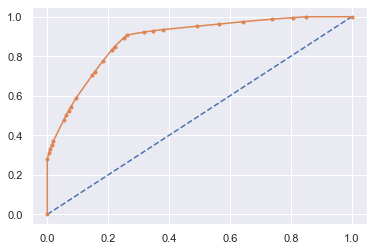

In [47]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### AUC and ROC for the test data

AUC: 0.883


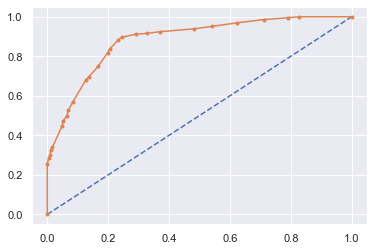

In [48]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Confusion Matrix for the training data

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels) 

0.8522825683533342

In [51]:
print((1985+4742)/(1985+650+706+4742))

0.832240504763083


In [52]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      2635
           1       0.88      0.91      0.89      5448

    accuracy                           0.85      8083
   macro avg       0.84      0.82      0.83      8083
weighted avg       0.85      0.85      0.85      8083



## Confusion Matrix for test data

In [53]:
confusion_matrix(test_labels, ytest_predict)

array([[ 901,  291],
       [ 236, 2037]], dtype=int64)

In [54]:
#Test Data Accuracy
reg_dt_model.score(X_test,test_labels)

0.8479076479076479

In [55]:
print((922+1941)/(922+270+332+1941))

0.8262626262626263


In [56]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1192
           1       0.88      0.90      0.89      2273

    accuracy                           0.85      3465
   macro avg       0.83      0.83      0.83      3465
weighted avg       0.85      0.85      0.85      3465



In [57]:
from sklearn.tree import DecisionTreeRegressor

# Conclusion

Accuracy on the Training Data: 83%  
Accuracy on the Test Data: 82%

AUC on the Training Data: 87.9%  
AUC on the Test: 88.1%

Accuracy, AUC, Precision and Recall for test data is almost inline with training data.  
This proves no overfitting or underfitting has happened, and overall the model is a good model for classification

FICO, term and gender (in same order of preference) are the most important variables in determining if a borrower will get into a delinquent stage 